# Mastère DMS : Méthodes Numériques
## Integration Equation Différentielle Ordinaire 

@author : Basile Marchand (basile.marchand@mines-paristech.fr)

### Modèle de Maxwell
$$ \dot{\varepsilon} = \frac{1}{E} \dot{\sigma} + \frac{1}{\eta} \sigma $$
avec $\varepsilon(t)=10^{-3} t$ imposé et $\sigma(t=0) = 0$

1. Calculer la solution analytique 
2. Déterminer la solution par une approche Euler explicite
3. Déterminer la solution par une approche Euler implicite
4. Faire de même avec la méthode RK4
5. Utiliser `scipy.integrate.ode` pour calculer la solution de ce problème et comparer

Données : $\eta = 1000\,MPa.s$, $E=20000\,MPa$, $T=10\,s$



In [4]:
E = 20000.
mu = 1000.
load = 1.e-3
sig_0 = 0

T=0.5
N = 100
dt = T/N


### Construction de la solution analytique 

In [3]:
import math 
def sol_analytique( t, params):
    E = params[0]
    mu = params[1]
    load = params[2]
    return load * mu * (1. - math.exp( - E/mu * t ) )


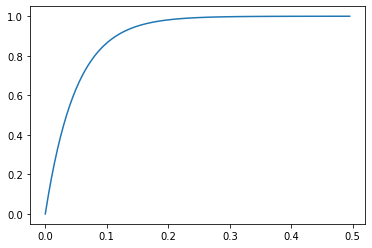

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt 

times = [ i*dt for i in range(N)]
sig_analytique = [ sol_analytique(t, [E,mu,load]) for t in times]

plt.plot(times, sig_analytique)
plt.show()

### Résolution numérique 

Il faut tout d'abord formuler le problème sous la forme : 

$$ \dot{q} = B ( q, t ) $$

Cela se traduit ici par la définition de la fonction suivante : 

In [7]:
def fonction_b( sig_previous, t, params):
    E = params[0]
    mu = params[1]
    load = params[2]
    return - (E/mu)*sig_previous + E*load

### Méthode explicite 

In [8]:
sig_explicite = [sig_0]
for i in range(1, N):
    s_previous = sig_explicite[i-1]
    s = s_previous + dt * fonction_b( s_previous,  times[i-1], (E, mu, load) )
    sig_explicite.append(s)



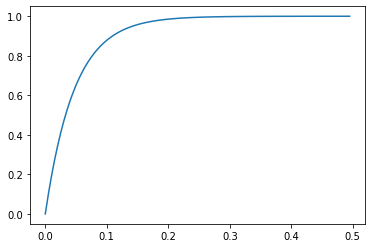

In [9]:
plt.plot(times, sig_explicite)

### Méthode implicite 

Le problème a résoudre étant relativement gentil, problème linéaire, la méthode implicite peut s'appliquer facilement sans avoir besoin d'un schéma de type newton à chaque itération. 

In [10]:
def fimplicite( sig_previous, dt, params):
    E = params[0]
    mu = params[1]
    load = params[2]

    return (sig_previous + dt*E*load) / ( 1 + dt * E/ mu )


In [11]:
sig_implicite = [sig_0]
for i in range(1,N):
    s_previous = sig_implicite[i-1]
    s = fimplicite( s_previous, dt, (E, mu, load))
    sig_implicite.append( s )

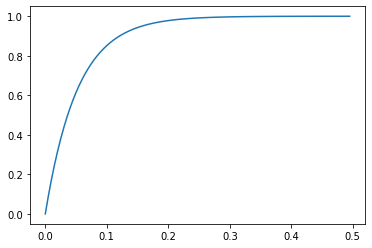

In [12]:
plt.plot(times, sig_implicite)

### Méthode de Runge-Kutta

In [13]:
sig_rk4 = [sig_0]
for i in range(1,N):
    s_prev=sig_rk4[i-1]
    d1q = dt*fonction_b(s_prev, times[i-1], (E,mu,load))
    d2q = dt*fonction_b(s_prev+d1q/2., times[i-1]+dt/2., (E,mu,load))
    d3q = dt*fonction_b(s_prev+d2q/2., times[i-1]+dt/2., (E,mu,load))
    d4q = dt*fonction_b(s_prev+d3q, times[i-1]+dt, (E,mu,load))
    s = s_prev + d1q/6. + d2q/3. + d3q/3.+d4q/6.
    sig_rk4.append( s )


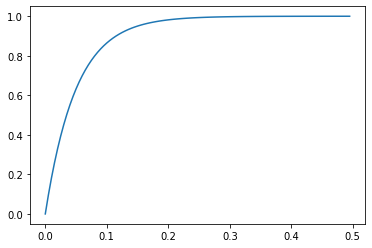

In [14]:
plt.plot(times, sig_rk4)